In [1]:
# from sklearn import datasets, linear_model
# from sklearn.model_selection import cross_val_predict

# diabetes = datasets.load_diabetes(as_frame=True)
# X_train = diabetes.data[:150]
# y_train = diabetes.target[:150]
# X_test = diabetes.data[150:]
# y_test = diabetes.target[150:]

# lasso = linear_model.Lasso()
# y_pred = cross_val_predict(lasso, X_train, y_train, cv=3)

# print("score on test: " + str(lasso.score(X_test, y_test)))
# print("score on train: "+ str(lasso.score(X_train, y_train)))


In [2]:
# importing packages
import pandas as pd # data processing
import numpy as np # working with arrays
import matplotlib.pyplot as plt # visualization
from termcolor import colored as cl # text customization
import itertools # advanced tools
import seaborn as sns
import time

from sklearn.preprocessing import StandardScaler # data normalization
from sklearn.preprocessing import MinMaxScaler # data normalization
from sklearn.model_selection import train_test_split # data split
from sklearn.preprocessing import LabelEncoder # label encoding
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold 
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.decomposition import PCA
from sklearn.model_selection import validation_curve

from sklearn.tree import DecisionTreeClassifier # Decision tree algorithm
from sklearn.neighbors import KNeighborsClassifier # KNN algorithm
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier # Random forest tree algorithm
from sklearn.ensemble import AdaBoostClassifier
from sklearn import svm

from sklearn.metrics import confusion_matrix # evaluation metric
from sklearn.metrics import accuracy_score # evaluation metric
from sklearn.metrics import f1_score # evaluation metric
from sklearn.metrics import precision_score # evaluation metric
from sklearn.metrics import recall_score # evaluation metric

# Read in Data

In [3]:
df = pd.read_csv("data/breast-cancer.csv")
df.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# Drop Unnecessary Column

In [4]:
df =df.drop(labels=["Unnamed: 32"],axis=1)


# Distribution of Target Variable

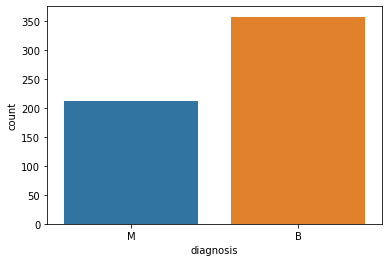

In [5]:
fig, ax = plt.subplots(figsize=(6,4))
sns.countplot(data=df, x="diagnosis" )
plt.savefig('BreastCancerImages/Unusual_Counts.png')

In [6]:
df["diagnosis"] = df["diagnosis"].replace("M",1)
df["diagnosis"] = df["diagnosis"].replace("B",0)


# Correlation Matrix

In [7]:

# def correlation_heatmap(train):
#     correlations = train.corr()

#     fig, ax = plt.subplots(figsize=(10,10))
#     sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
#                 square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
#     plt.savefig('Breast_Cancer_Corellation_Heatmap.png')
    
#     plt.show()
    
# correlation_heatmap(df)

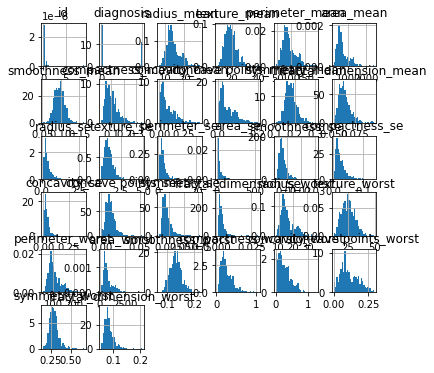

In [8]:
df.hist(bins=30, figsize=(6,6), density=True)
plt.savefig('BreastCancerImages/Data_Distribution.png')
plt.show()


# Is Dataset Balanced?

In [9]:
# Look to see if this dataset is unbalanced. 
cases = len(df)
normal_count = len(df[df.diagnosis == 0])
diagnosis_count = len(df[df.diagnosis == 1])
diagnosis_percentage = round(diagnosis_count/cases*100, 2)

print(cl('diagnosis COUNT', attrs = ['bold']))
print(cl('--------------------------------------------', attrs = ['bold']))
print(cl('Total number of cases are {}'.format(cases), attrs = ['bold']))
print(cl('Number of Normal cases are {}'.format(normal_count), attrs = ['bold']))
print(cl('Number of diagnosis cases are {}'.format(diagnosis_count), attrs = ['bold']))
print(cl('Percentage of diagnosis cases is {}'.format(diagnosis_percentage), attrs = ['bold']))
print(cl('--------------------------------------------', attrs = ['bold']))

diagnosis COUNT
--------------------------------------------
Total number of cases are 569
Number of Normal cases are 357
Number of diagnosis cases are 212
Percentage of diagnosis cases is 37.26
--------------------------------------------


# Data Split

In [10]:
X = df.drop('diagnosis', axis = 1).values
y = df['diagnosis'].values

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [12]:
# Normalize dataset after split in order to avoid data leakage. 
scaler = StandardScaler()
# scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train))
X_test = pd.DataFrame(scaler.transform(X_test))

In [14]:
scaler = StandardScaler()
X_transformed = scaler.fit_transform(X)
# X_test = scaler.transform(X_test)



# Learning Curves

In [ ]:
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None, scoring = "accuracy",
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, scoring = scoring,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)
    
    # plot scores
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    plt.legend(loc="best")
    plt.title(title)

    return plt

In [ ]:
#1 DTs
title = "Learning Curves (Decision Tree)"

# model = DecisionTreeClassifier(max_depth = 4, criterion = 'entropy')
model = DecisionTreeClassifier(max_depth = 4)
plot_learning_curve(model, title, X, y, cv=5)

plt.xlabel("Training Examples Used")
plt.ylabel("Accuracy")
plt.savefig('BreastCancerImages/LR_DecisionTree.png')
plt.show()

In [ ]:
title = "Learning Curves (Neural Networks)"

model = MLPClassifier(max_iter = 1000)
plot_learning_curve(model, title, X, y, cv=5)
plt.xlabel("Training Examples Used")
plt.ylabel("Accuracy")
plt.savefig('BreastCancerImages/LR_NeuralNets.png')

plt.show()

In [ ]:
title = "Learning Curves (AdaBoost)"

model = AdaBoostClassifier(n_estimators=100, random_state=0)
plot_learning_curve(model, title, X, y, cv=5)
plt.xlabel("Training Examples Used")
plt.ylabel("Accuracy")
plt.savefig('BreastCancerImages/LR_AdaBoost.png')

plt.show()

In [ ]:
svm_model = svm.SVC(kernel = "linear")


title = "Learning Curves (SVM, RBF kernel, $\gamma=0.001$)"
plot_learning_curve(svm_model, title, X, y, cv=5)
# plot_learning_curve(svm_model, title, X_t_train, y_train, cv=5)
plt.xlabel("Training Examples Used")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
title = "Learning Curves (KNN)"

model = KNeighborsClassifier(n_neighbors = 3)
plot_learning_curve(model, title, X, y, cv=5)
plt.xlabel("Training Examples Used")
plt.ylabel("Accuracy")
plt.show()

# Validation Curves

***

#### Decision Trees

In [ ]:
estimator = DecisionTreeClassifier()
estimator.get_params().keys()
parameter_range = np.arange(1, 20,1)
 
# Calculate accuracy on training and test set using the
train_score, test_score = validation_curve(DecisionTreeClassifier(), X, y,
                                       param_name = "max_depth",
                                       param_range = parameter_range,
                                       cv = 5, 
                                       scoring = "accuracy")
 
# Calculating mean and standard deviation of training score
mean_train_score = np.mean(train_score, axis = 1)
std_train_score = np.std(train_score, axis = 1)
 
# Calculating mean and standard deviation of testing score
mean_test_score = np.mean(test_score, axis = 1)
std_test_score = np.std(test_score, axis = 1)
 
# # Plot mean accuracy scores for training and testing scores
plt.plot(parameter_range, mean_train_score,
     label = "Training Score", color = 'b')
plt.plot(parameter_range, mean_test_score,
   label = "Cross Validation Score", color = 'g')
 
# # Creating the plot
plt.title("Validation Curve with Decision Tree Classifier")
plt.xlabel("Max Tree Depth")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc = 'best')
plt.savefig('BreastCancerImages/VC_Decision Trees_H1.png')

plt.show()

In [ ]:
parameter_range = np.arange(2, 100,1)
 
# Calculate accuracy on training and test set using the
train_score, test_score = validation_curve(DecisionTreeClassifier(), X, y,
                                       param_name = "max_leaf_nodes",
                                       param_range = parameter_range,
                                       cv = 5, 
                                       scoring = "accuracy")
 
# Calculating mean and standard deviation of training score
mean_train_score = np.mean(train_score, axis = 1)
std_train_score = np.std(train_score, axis = 1)
 
# Calculating mean and standard deviation of testing score
mean_test_score = np.mean(test_score, axis = 1)
std_test_score = np.std(test_score, axis = 1)
 
# # Plot mean accuracy scores for training and testing scores
plt.plot(parameter_range, mean_train_score,
     label = "Training Score", color = 'b')
plt.plot(parameter_range, mean_test_score,
   label = "Cross Validation Score", color = 'g')
 
# # Creating the plot
plt.title("Validation Curve with Decision Tree Classifier")
plt.xlabel("Minimum Samples at Leaf Node")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc = 'best')
plt.savefig('BreastCancerImages/VC_Decision Trees_H2.png')

plt.show()

#### Neural Nets

In [ ]:
estimator = MLPClassifier(max_iter = 500)
# estimator.get_params().keys()
parameter_range = [0.0001,0.001,0.01,0.1]
 
# Calculate accuracy on training and test set using the
train_score, test_score = validation_curve(estimator, X, y,
                                       param_name = "alpha",
                                       param_range = parameter_range,
                                       cv = 5, 
                                       scoring = "accuracy")
 
# Calculating mean and standard deviation of training score
mean_train_score = np.mean(train_score, axis = 1)
std_train_score = np.std(train_score, axis = 1)
 
# Calculating mean and standard deviation of testing score
mean_test_score = np.mean(test_score, axis = 1)
std_test_score = np.std(test_score, axis = 1)
 
# # Plot mean accuracy scores for training and testing scores
plt.plot(parameter_range, mean_train_score,
     label = "Training Score", color = 'b')
plt.plot(parameter_range, mean_test_score,
   label = "Cross Validation Score", color = 'g')
 
# # Creating the plot
plt.title("Validation Curve with Neural Nets (alpha)")
plt.xlabel("Alpha")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc = 'best')
plt.savefig('BreastCancerImages/VC_NeuralNets_H1.png')

plt.show()

In [ ]:
estimator = MLPClassifier(max_iter = 1000)
# estimator.get_params().keys()
parameter_range = [0.0001,.0005,0.001,.005,0.01,.05]
 
# Calculate accuracy on training and test set using the
train_score, test_score = validation_curve(estimator, X, y,
                                       param_name = "learning_rate_init",
                                       param_range = parameter_range,
                                       cv = 5, 
                                       scoring = "accuracy")
 
# Calculating mean and standard deviation of training score
mean_train_score = np.mean(train_score, axis = 1)
std_train_score = np.std(train_score, axis = 1)
 
# Calculating mean and standard deviation of testing score
mean_test_score = np.mean(test_score, axis = 1)
std_test_score = np.std(test_score, axis = 1)
 
# # Plot mean accuracy scores for training and testing scores
plt.plot(parameter_range, mean_train_score,
     label = "Training Score", color = 'b')
plt.plot(parameter_range, mean_test_score,
   label = "Cross Validation Score", color = 'g')
 
# # Creating the plot
plt.title("Validation Curve with Neural Nets (Learning Rate)")
plt.xlabel("Learning Rate")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc = 'best')
plt.savefig('BreastCancerImages/VC_NeuralNets_H2.png')

plt.show()

#### AdaBoost

In [ ]:
estimator = AdaBoostClassifier()
# estimator.get_params().keys()

parameter_range = np.arange(1,150,15)
 
# Calculate accuracy on training and test set using the
train_score, test_score = validation_curve(estimator, X, y,
                                       param_name = "n_estimators",
                                       param_range = parameter_range,
                                       cv = 5, 
                                       scoring = "accuracy")
 
# Calculating mean and standard deviation of training score
mean_train_score = np.mean(train_score, axis = 1)
std_train_score = np.std(train_score, axis = 1)
 
# Calculating mean and standard deviation of testing score
mean_test_score = np.mean(test_score, axis = 1)
std_test_score = np.std(test_score, axis = 1)
 
# # Plot mean accuracy scores for training and testing scores
plt.plot(parameter_range, mean_train_score,
     label = "Training Score", color = 'b')
plt.plot(parameter_range, mean_test_score,
   label = "Cross Validation Score", color = 'g')
 
# # Creating the plot
plt.title("Validation Curve with AdaBoost (# of Learners)")
plt.xlabel("Number of Weak Learners")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc = 'best')
plt.savefig('BreastCancerImages/VC_AdaBoost_H1.png')

plt.show()

In [ ]:
estimator = AdaBoostClassifier()
# estimator.get_params().keys()

parameter_range = np.arange(0.1,1,.1)
 
# Calculate accuracy on training and test set using the
train_score, test_score = validation_curve(estimator, X, y,
                                       param_name = "learning_rate",
                                       param_range = parameter_range,
                                       cv = 5, 
                                       scoring = "accuracy")
 
# Calculating mean and standard deviation of training score
mean_train_score = np.mean(train_score, axis = 1)
std_train_score = np.std(train_score, axis = 1)
 
# Calculating mean and standard deviation of testing score
mean_test_score = np.mean(test_score, axis = 1)
std_test_score = np.std(test_score, axis = 1)
 
# # Plot mean accuracy scores for training and testing scores
plt.plot(parameter_range, mean_train_score,
     label = "Training Score", color = 'b')
plt.plot(parameter_range, mean_test_score,
   label = "Cross Validation Score", color = 'g')
 
# # Creating the plot
plt.title("Validation Curve with AdaBoost (Learning Rate)")
plt.xlabel("Learning Rate")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc = 'best')
plt.savefig('BreastCancerImages/VC_AdaBoost_H2.png')

plt.show()

#### SVM

In [ ]:
# scaler = StandardScaler()
# X_transformed = scaler.fit_transform(X)
# # X_test = scaler.transform(X_test)

# pca = PCA(n_components=3)# adjust yourself
# pca.fit(X_transformed)
# X_transformed = pca.transform(X_transformed)

# estimator = svm.SVC(kernel = "linear")
estimator = svm.SVC()
# estimator.get_params().keys()

parameter_range = np.linspace(0.1,1,10)
 
# Calculate accuracy on training and test set using the
train_score, test_score = validation_curve(estimator, X, y,
                                       param_name = "C",
                                       param_range = parameter_range,
                                       cv = 5, 
                                       scoring = "accuracy")
 
# Calculating mean and standard deviation of training score
mean_train_score = np.mean(train_score, axis = 1)
std_train_score = np.std(train_score, axis = 1)
 
# Calculating mean and standard deviation of testing score
mean_test_score = np.mean(test_score, axis = 1)
std_test_score = np.std(test_score, axis = 1)
 
# # Plot mean accuracy scores for training and testing scores
plt.plot(parameter_range, mean_train_score,
     label = "Training Score", color = 'b')
plt.plot(parameter_range, mean_test_score,
   label = "Cross Validation Score", color = 'g')
 
# # Creating the plot
plt.title("Validation Curve with SVM (C)")
plt.xlabel("C")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc = 'best')
plt.savefig('BreastCancerImages/VC_SVM_H1.png')

plt.show()

In [ ]:

# scaler = StandardScaler()
# X_transformed = scaler.fit_transform(X)
# # X_test = scaler.transform(X_test)

# pca = PCA(n_components=3)# adjust yourself
# pca.fit(X_transformed)
# X_transformed = pca.transform(X_transformed)

# estimator = svm.SVC(kernel = "linear")
estimator = svm.SVC()
# # estimator.get_params().keys()

# parameter_range = np.linspace(0.1,1,10)
 
# Calculate accuracy on training and test set using the
train_score, test_score = validation_curve(estimator, X, y,
                                       param_name = "gamma",
                                       param_range = parameter_range,
                                       cv = 5, 
                                       scoring = "accuracy")
 
# Calculating mean and standard deviation of training score
mean_train_score = np.mean(train_score, axis = 1)
std_train_score = np.std(train_score, axis = 1)
 
# Calculating mean and standard deviation of testing score
mean_test_score = np.mean(test_score, axis = 1)
std_test_score = np.std(test_score, axis = 1)
 
# # Plot mean accuracy scores for training and testing scores
plt.plot(parameter_range, mean_train_score,
     label = "Training Score", color = 'b')
plt.plot(parameter_range, mean_test_score,
   label = "Cross Validation Score", color = 'g')
 
# # Creating the plot
plt.title("Validation Curve with SVM (Gamma)")
plt.xlabel("Gamma")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc = 'best')
plt.savefig('BreastCancerImages/VC_SVM_H2.png')

plt.show()

#### KNN

In [ ]:


estimator = KNeighborsClassifier(metric = 'euclidean')
# estimator.get_params().keys()

parameter_range = np.arange(1,20,1)
 
# Calculate accuracy on training and test set using the
train_score, test_score = validation_curve(estimator, X_transformed, y,
                                       param_name = "n_neighbors",
                                       param_range = parameter_range,
                                       cv = 5, 
                                       scoring = "accuracy")
 
# Calculating mean and standard deviation of training score
mean_train_score = np.mean(train_score, axis = 1)
std_train_score = np.std(train_score, axis = 1)
 
# Calculating mean and standard deviation of testing score
mean_test_score = np.mean(test_score, axis = 1)
std_test_score = np.std(test_score, axis = 1)
 
# # Plot mean accuracy scores for training and testing scores
plt.plot(parameter_range, mean_train_score,
     label = "Training Score", color = 'b')
plt.plot(parameter_range, mean_test_score,
   label = "Cross Validation Score", color = 'g')
 
# # Creating the plot
plt.title("Validation Curve with KNN")
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc = 'best')
plt.savefig('BreastCancerImages/VC_KNN_H1.png')

plt.show()

In [ ]:


estimator = KNeighborsClassifier(metric = 'manhattan')
# estimator.get_params().keys()

parameter_range = np.arange(1,20,1)
 
# Calculate accuracy on training and test set using the
train_score, test_score = validation_curve(estimator, X_transformed, y,
                                       param_name = "n_neighbors",
                                       param_range = parameter_range,
                                       cv = 5, 
                                       scoring = "accuracy")
 
# Calculating mean and standard deviation of training score
mean_train_score = np.mean(train_score, axis = 1)
std_train_score = np.std(train_score, axis = 1)
 
# Calculating mean and standard deviation of testing score
mean_test_score = np.mean(test_score, axis = 1)
std_test_score = np.std(test_score, axis = 1)
 
# # Plot mean accuracy scores for training and testing scores
plt.plot(parameter_range, mean_train_score,
     label = "Training Score", color = 'b')
plt.plot(parameter_range, mean_test_score,
   label = "Cross Validation Score", color = 'g')
 
# # Creating the plot
plt.title("Validation Curve with KNN")
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc = 'best')
plt.savefig('BreastCancerImages/VC_KNN_H2.png')

plt.show()

# Loss Curves

/Users/wilmertejada/opt/anaconda3/envs/Anomaly_Detection/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


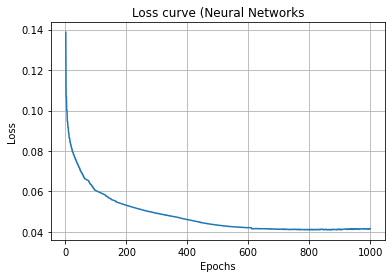

In [24]:
num_epochs = 1000
train_loss = np.empty(num_epochs)
train_scores = np.empty(num_epochs)
val_scores = np.empty(num_epochs)

nn = MLPClassifier(hidden_layer_sizes=(5, 2), random_state=7, max_iter=1000, warm_start=True)
X_train_loss, X_test_loss, y_train_loss, y_test_loss = train_test_split(X_train, y_train, test_size=0.2, random_state=18)
for i in range(num_epochs):
    nn.fit(X_train_loss, y_train_loss)
    train_loss[i] = nn.loss_
    train_scores[i] = accuracy_score(y_train_loss, nn.predict(X_train_loss))
    val_scores[i] = accuracy_score(y_test_loss, nn.predict(X_test_loss))
    
xrange = np.arange(num_epochs) + 1
plt.figure()
plt.plot(xrange, train_loss)
plt.title('Loss curve (Neural Networks')
plt.xlabel('Epochs')
plt.ylabel("Loss")
plt.grid()

plt.savefig('BreastCancerImages/nn_train_loss.png')
plt.show()

In [ ]:
num_epochs = 1000
train_loss = np.empty(num_epochs)
train_scores = np.empty(num_epochs)
val_scores = np.empty(num_epochs)

nn = svm.SVC()
X_train_loss, X_test_loss, y_train_loss, y_test_loss = train_test_split(X_train, y_train, test_size=0.2, random_state=18)
for i in range(num_epochs):
    nn.fit(X_train_loss, y_train_loss)
    train_loss[i] = nn.loss_
    train_scores[i] = accuracy_score(y_train_loss, nn.predict(X_train1))
    val_scores[i] = accuracy_score(y_val, nn.predict(X_val))
    
xrange = np.arange(num_epochs) + 1
plt.figure()
plt.plot(xrange, train_loss)
plt.title('Loss curve (Neural Networks')
plt.xlabel('Epochs')
plt.ylabel("Loss")
plt.grid()
#plt.savefig(fig_path + 'nn_train_loss.png')
plt.show()

# Modeling

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

# 1. Decision Tree
start = time.time()
tree_model = DecisionTreeClassifier(max_depth = 4, criterion = 'entropy')
tree_model.fit(X_train, y_train)

end = time.time()
print("Training time: ",end - start, " seconds")

start = time.time()
tree_yhat = tree_model.predict(X_test)
end = time.time()
print("Query time: ",end - start, " seconds")

print("Accuracy: ", accuracy_score(y_test, tree_yhat))


Training time:  0.0018868446350097656  seconds
Query time:  0.0005939006805419922  seconds
Accuracy:  0.9035087719298246


In [19]:
# 2. Neural Networks (Cross-Entropy loss function)(Softmax activation function)
start = time.time()
nn_model = MLPClassifier(solver='lbfgs', alpha=1e-4,hidden_layer_sizes=(5, 2), random_state=0, max_iter = 1000)
nn_model.fit(X, y)

end = time.time()
print("Training time: ",end - start, " seconds")

start = time.time()
nn_yhat = nn_model.predict(X_test)
end = time.time()
print("Query time: ",end - start, " seconds")
print("Accuracy: ", accuracy_score(y_test, nn_yhat))

Training time:  0.18123912811279297  seconds
Query time:  0.0009789466857910156  seconds
Accuracy:  0.9649122807017544


In [20]:
#3. Boosting (AdaBoost)
start = time.time()
boost_model = AdaBoostClassifier(n_estimators=100, random_state=0)
boost_model.fit(X_train, y_train)
end = time.time()
print("Training time: ",end - start, " seconds")

start = time.time()
boost_yhat = boost_model.predict(X_test)
end = time.time()
print("Query time: ",end - start, " seconds")
print("Accuracy: ", accuracy_score(y_test, boost_yhat))

Training time:  0.3071098327636719  seconds
Query time:  0.03620505332946777  seconds
Accuracy:  0.9473684210526315


In [21]:
#4. SVM
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

pca = PCA(n_components=3)# adjust yourself
pca.fit(X_train)
X_t_train = pca.transform(X_train)
X_t_test = pca.transform(X_test)

# svm_model = svm.SVC(kernel = "linear", gamma = .01, C = 10000)
svm_model = svm.SVC(kernel = "linear")

start = time.time()
svm_model.fit(X_t_train, y_train)
end = time.time()
print("Training time: ",end - start, " seconds")

start = time.time()

svm_yhat = svm_model.predict(X_t_test)
end = time.time()
print("Query time: ",end - start, " seconds")
print(accuracy_score(y_test, svm_yhat))

Training time:  0.0025610923767089844  seconds
Query time:  0.0017061233520507812  seconds
0.9298245614035088


In [22]:
#5. K-Nearest Neighbors

n = 5
knn = KNeighborsClassifier(n_neighbors = n)
start = time.time()
knn.fit(X_train, y_train)
end = time.time()
print("Training time: ",end - start, " seconds")

start = time.time()
knn_yhat = knn.predict(X_test)
end = time.time()
print("Query time: ",end - start, " seconds")
print(accuracy_score(y_test, knn_yhat))

Training time:  0.0016448497772216797  seconds
Query time:  0.022873878479003906  seconds
0.9263157894736842


In [ ]:
# Accuracy score

# print(cl('ACCURACY SCORE', attrs = ['bold']))
# print(cl('--------------------------------------------------', attrs = ['bold']))
# print(cl('Decision Tree = {}'.format(accuracy_score(y_test, tree_yhat)), attrs = ['bold']))
# print(cl('--------------------------------------------------', attrs = ['bold']))
# print(cl('Neural Network = {}'.format(accuracy_score(y_test, nn_yhat)), attrs = ['bold'], color = 'red'))
# print(cl('--------------------------------------------------', attrs = ['bold']))
# print(cl('AdaBoost = {}'.format(accuracy_score(y_test, boost_yhat)), attrs = ['bold'], color = 'red'))
# print(cl('--------------------------------------------------', attrs = ['bold']))
# print(cl('SVM = {}'.format(accuracy_score(y_test, svm_yhat)), attrs = ['bold'], color = 'red'))
# print(cl('--------------------------------------------------', attrs = ['bold']))
# print(cl('KNN = {}'.format(accuracy_score(y_test, knn_yhat)), attrs = ['bold']))
# print(cl('--------------------------------------------------', attrs = ['bold']))

# Confusion Matrix

In [ ]:
def plot_confusion_matrix(cm, classes, title, normalize = False, cmap = plt.cm.Blues):
    title = 'Confusion Matrix of {}'.format(title)
    if normalize:
        cm = cm.astype(float) / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
tree_matrix = confusion_matrix(y, tree_model_predict, labels = [0, 1]) # Decision Tree
# knn_matrix = confusion_matrix(y_test, knn_yhat, labels = [0, 1]) # K-Nearest Neighbors
# lr_matrix = confusion_matrix(y_test, lr_yhat, labels = [0, 1]) # Logistic Regression
# # svm_matrix = confusion_matrix(y_test, svm_yhat, labels = [0, 1]) # Support Vector Machine
# rf_matrix = confusion_matrix(y_test, rf_yhat, labels = [0, 1]) # Random Forest Tree
# xgb_matrix = confusion_matrix(y_test, xgb_yhat, labels = [0, 1]) # XGBoost

In [ ]:
tree_cm_plot = plot_confusion_matrix(tree_matrix, 
                                classes = ['Benign (0)','Malignant (1)'], 
                                normalize = False, title = 'Decision Tree')
plt.savefig('BreastCancerImages/Confusion_Matrix.png')

In [ ]:
title = "Learning Curves (KNN)"

model = KNeighborsClassifier()
plot_learning_curve(model, title, X_train, y_train, cv=5)
plt.xlabel("Training Examples Used")
plt.ylabel("Accuracy")
plt.savefig('BreastCancerImages/LR_KNN.png')
plt.show()